In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [51]:
# Parâmetros
M = 4.6e-3  # [g] Massa do Filamento
R2 = 1  # [ohm]
Klt = 0.011  # [ohm/K] Constante do Filamento (Resistência)
Kr = 3.3e-14  # [W/K^4] Constante do Filamento (Radiação)
Tamb = 300  # [K] Temperatura Inicial (Ambiente)
cp = 0.13  # [J/g.K] Calor Específico
Ct = cp * M  # [J/K] Capacidade de Calor
tmax = 1  # [s] Tempo da Simulação
N = 10000  # Número de Pontos da Simulação
t = np.linspace(0, tmax, N)  # Base de Plotagem do Mod
T = np.zeros(N)  # [K] Temperatura do Filamento
R1 = np.zeros(N)  # [ohms] Resistência da Lâmpada
I = np.zeros(N)  # [A] Corrente
dt = t[1] - t[0]  # Passo de Tempo [s]
V_inicial = 9  # [V] Tensão Inicial Aplicada
V = V_inicial  # Define a tensão inicial
t_desligamento = tmax / 2  # Tempo em que a tensão cai para 0V
T[0] = Tamb  # Temperatura Inicial
R1[0] = Klt * Tamb  # Resistência Inicial do Filamento
I[0] = V / (R1[0] + R2)  # [A] Corrente


In [52]:
# LOOP DE SIMULAÇÃO
for k in range(N - 1):
    # Ajusta a tensão para 0V após t_desligamento
    if t[k] >= t_desligamento:
        V = 0
    
    # Cálculo das potências e evolução da temperatura
    Pe = Klt * T[k] * ((V / (R1[k] + R2)) ** 2)  # [watts] Potência Elétrica
    Pr = Kr * (T[k] ** 4)  # [watts] Potência Irradiada (Corpo Negro)
    T[k + 1] = T[k] + (dt / Ct) * (Pe - Pr)  # Cálculo da Evolução da Temperatura
    R1[k + 1] = Klt * T[k + 1]  # [ohms] Resistência da Lâmpada
    I[k + 1] = V / (R1[k + 1] + R2)  # [A] Corrente na Lâmpada


In [66]:
# Cálculo do Tempo para atingir 90% da Resistência de Equilíbrio
R_equilibrio = 36  # [ohms] Resistência de Equilíbrio
R_target = 0.9 * R_equilibrio  # [ohms] 90% da Resistência de Equilíbrio

# Encontrar o tempo para atingir 90% da resistência de equilíbrio após o desligamento
indices_após_desligamento = np.where(t >= t_desligamento)[0]
t_90 = t[indices_após_desligamento][np.where(R1[indices_após_desligamento] <= R_target)[0][0]]

print(R_target)

for i in range(len(R1)):
    if R1[i] >= 30 and R1[i] <= 33:
        print(i, R1[i])


# Exibir Resultado
print(f'Tempo para atingir 90% da resistência de equilíbrio: {t_90} s')

32.4
4675 30.001160191737576
4676 30.002452631782592
4677 30.003744305490812
4678 30.005035213256953
4679 30.006325355475596
4680 30.007614732541185
4681 30.008903344848026
4682 30.01019119279029
4683 30.011478276762027
4684 30.01276459715712
4685 30.01405015436934
4686 30.01533494879232
4687 30.01661898081954
4688 30.01790225084436
4689 30.01918475926
4690 30.020466506459535
4691 30.021747492835917
4692 30.02302771878195
4693 30.024307184690308
4694 30.025585890953533
4695 30.026863837964015
4696 30.028141026114017
4697 30.02941745579567
4698 30.030693127400962
4699 30.031968041321747
4700 30.033242197949736
4701 30.034515597676513
4702 30.03578824089352
4703 30.037060127992063
4704 30.038331259363307
4705 30.03960163539829
4706 30.040871256487904
4707 30.042140123022907
4708 30.043408235393922
4709 30.044675593991432
4710 30.04594219920579
4711 30.0472080514272
4712 30.048473151045744
4713 30.049737498451357
4714 30.051001094033833
4715 30.052263938182843
4716 30.053526031287905
4717

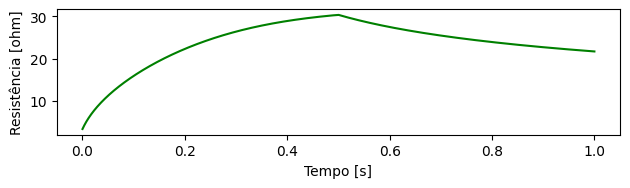

In [54]:
# Plot dos resultados (opcional)
# plt.figure(figsize=(12, 6))
# plt.subplot(3, 1, 1)
# plt.plot(t, T, 'r')
# plt.title('Modelo Dinâmico: Lâmpada Elétrica de Filamento')
# plt.xlabel('Tempo [s]')
# plt.ylabel('Temperatura [K]')

# plt.subplot(3, 1, 2)
# plt.plot(t, I, 'b')
# plt.xlabel('Tempo [s]')
# plt.ylabel('Corrente [A]')

plt.subplot(3, 1, 3)
plt.plot(t, R1, 'g')
plt.xlabel('Tempo [s]')
plt.ylabel('Resistência [ohm]')
plt.tight_layout()
plt.show()